In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../../pynoddy/")

import pynoddy
import pynoddy.history
import pynoddy.output
import pynoddy.events
import pynoddy.experiment

import importlib

ModuleNotFoundError: No module named 'pynoddy'

In [2]:
history = "ch4_model.his"
output = "ch4_model_out"

In [8]:
cs = 25
extent = (3000, 200, 2000)

In [9]:
nm = pynoddy.history.NoddyHistory()
# set model extent
nm.set_extent(extent[0],extent[1],extent[2])
# set model origin x,y,z
nm.set_origin(0., 0., extent[2])
# set model cube size
nm.change_cube_size(cs)

# stratigraphic event
strati_options = {
    'num_layers' : 5,
    'layer_names' : ['5','4','3','2','1'],
    'layer_thickness' : [350,200,200,200,200]
}
nm.add_event('stratigraphy', strati_options)

# fold event
fold_options = {
    "name": "fold1",
    "pos": (500,0,1000),
    "wavelength": 4000.,
    "amplitude": 400
}
nm.add_event("fold", fold_options)

# write history file
nm.write_history(history)

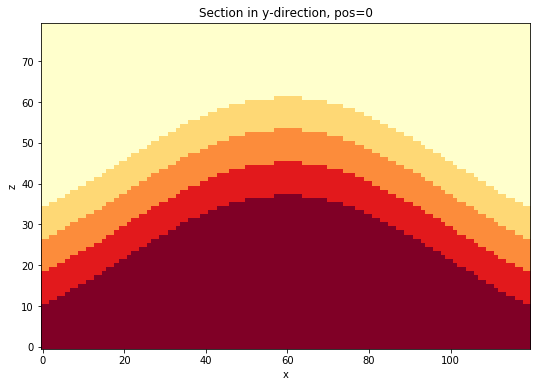

In [10]:
ex = pynoddy.experiment.Experiment(history)
ex.plot_section()

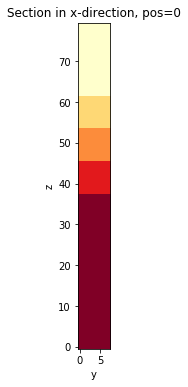

In [11]:
ex.plot_section(direction="x")

In [12]:
sys.path.append("../")
import gempy as gp

In [14]:
# initialize geo_data object
geo_data = gp.create_data([0, extent[0], 
                           0, extent[1], 
                           0, extent[2]],
                          resolution=[int(extent[0]/cs), 
                                      int(extent[1]/cs), 
                                      int(extent[2]/cs)])

In [15]:
x = [250,750,500]
y = [0,100,200]
layers = [2,3,4,5]

for l in layers:
    i_df = ex.export_interf_gp(x,y, layer=l, group_id="l"+str(l)+"_a")
    gp.set_interfaces(geo_data, i_df, append=True)

In [16]:
x = [2750,2250,2500]
y = [0,100,200]
layers = [2,3,4,5]

for l in layers:
    i_df = ex.export_interf_gp(x,y, layer=l, group_id="l"+str(l)+"_b")
    gp.set_interfaces(geo_data, i_df, append=True)

In [17]:
geo_data.interfaces

,X,X_std,Y,Y_std,Z,Z_std,annotations,formation,formation_number,group_id,isFault,order_series,series
0,250,0,0,0,996,0,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",Layer 2,1,l2_a,False,1,Default serie
1,2500,0,200,0,1149,0,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",Layer 2,1,l2_b,False,1,Default serie
2,2250,0,100,0,1298,0,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",Layer 2,1,l2_b,False,1,Default serie
3,2750,0,0,0,995,0,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",Layer 2,1,l2_b,False,1,Default serie
4,500,0,200,0,1149,0,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",Layer 2,1,l2_a,False,1,Default serie
5,750,0,100,0,1299,0,"${\bf{x}}_{\alpha \,{\bf{1}},5}$",Layer 2,1,l2_a,False,1,Default serie
6,2750,0,0,0,395,0,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",Layer 5,2,l5_b,False,1,Default serie
7,500,0,200,0,549,0,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",Layer 5,2,l5_a,False,1,Default serie
8,750,0,100,0,699,0,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",Layer 5,2,l5_a,False,1,Default serie
9,250,0,0,0,396,0,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",Layer 5,2,l5_a,False,1,Default serie


<IPython.core.display.Javascript object>


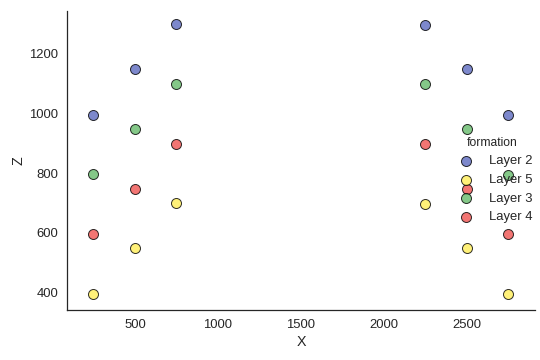

In [19]:
%matplotlib notebook
gp.plot_data(geo_data)

In [20]:
group_ids = ["l2_a", "l2_b"]
group_obj = []
for gid in group_ids:
    group_obj.append(gp.DataManagement.DataPlane(geo_data, 
                                                 gid, 
                                                 "interf_to_fol"))
    
for go in group_obj:
    go.set_fol()

In [21]:
geo_data.set_formation_number()
geo_data.order_table()

<IPython.core.display.Javascript object>


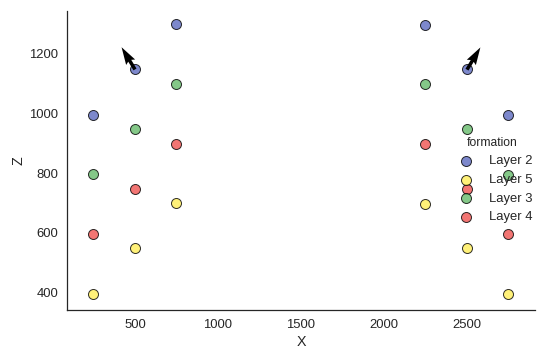

In [22]:
gp.plot_data(geo_data)

In [ ]:
interp_data = gp.InterpolatorInput(geo_data, u_grade=[3])

In [ ]:
sol_example = gp.compute_model(interp_data)

In [ ]:
gp.plot_section(geo_data, sol_example[0,0,:], 1, plot_data = True)

In [35]:
geo_data.import_data_csv

In [26]:
geo_data.interfaces.to_csv("../Tutorial/data/tutorial_ch4_interfaces")

In [27]:
geo_data.foliations.to_csv("../Tutorial/data/tutorial_ch4_foliations")